# Project 2 Churn Analysis
## Francis Yang - 12/5/2022

This project is about a very common business problem: analyzing customer churn. In this project, using *supervised learning models*, you will identify cell phone service customers who are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service. Furthermore, it would help to analyze the top factors that influence user retention to guide the company prevent user churn. The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually. You may find solutions to very similar data science problems on many different platforms. It is important that you put all your effort to get to a working solution yourself.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

data = pd.read_csv("datasets/churn.csv")

In [2]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

Correct predictor data type

In [4]:
cmap = {" False.":False, " True.":True}
data['churned'] = data['churned'].replace(cmap)

Correct NaN values and data type

In [5]:
data['total_eve_charge'] = data['total_eve_charge'].replace({'?':np.nan})
data['total_eve_charge'] = data['total_eve_charge'].astype(float)
data['intl_plan'] = data['intl_plan'].astype('category')
data['voice_mail_plan'] = data['voice_mail_plan'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          5000 non-null   object  
 1   account_length                 5000 non-null   int64   
 2   area_code                      5000 non-null   int64   
 3   phone_number                   5000 non-null   object  
 4   intl_plan                      5000 non-null   category
 5   voice_mail_plan                5000 non-null   category
 6   number_vmail_messages          5000 non-null   int64   
 7   total_day_minutes              5000 non-null   float64 
 8   total_day_calls                5000 non-null   int64   
 9   total_day_charge               5000 non-null   float64 
 10  total_eve_minutes              5000 non-null   float64 
 11  total_eve_calls                5000 non-null   int64   
 12  total_eve_charge               499

## Visualization

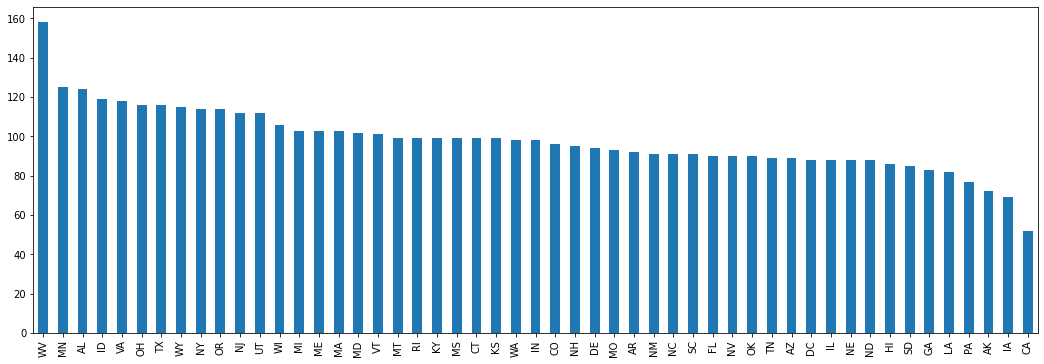

In [7]:
data['state'].value_counts().plot(kind='bar',figsize=(18,6));

Somewhat uniform distribution of samples

In [8]:
data['state'].value_counts().shape

(51,)

Washington DC has its own data

In [9]:
gc = data.groupby(by=['state','area_code','churned'])

In [10]:
group_means = gc.mean()
group_means

account_length  number_vmail_messages  \
state area_code churned                                          
AK    408       False         83.800000              11.666667   
      415       False        100.676471              12.852941   
                True         112.500000               4.750000   
      510       False        103.722222               2.666667   
                True         152.000000               0.000000   
...                                 ...                    ...   
WY    408       True         141.000000               0.000000   
      415       False         97.625000               8.250000   
                True         110.200000               5.200000   
      510       False         97.250000               9.350000   
                True         103.800000               0.000000   

                         total_day_minutes  total_day_calls  total_day_charge  \
state area_code churned                                                         
AK    408       False           172.906667        97.600000         29.394667   
      415       False           190.905882       103.529412         32.454412   
                True            162.900000        91.500000         27.692500   
      510       False           166.122222        93.000000         28.241111   
                True            302.800000       143.000000         51.480000   
...                                    ...              ...               ...   
WY    408       True            301.400000        87.000000         51.240000   
      415       False           176.160714       102.053571         29.948036   
                True            218.860000        99.400000         37.206000   
      510       False           179.835000       103.600000         30.572500   
                True            234.260000       100.600000         39.822000   

                         total_eve_minutes  total_eve_calls  total_eve_charge  \
state area_code churned                                                         
AK    408       False           169.940000        98.933333         14.445333   
      415       False           192.197059        99.558824         16.336471   
                True            173.125000       102.500000         14.715000   
      510       False           205.061111        98.833333         17.430000   
                True            189.800000        69.000000         16.130000   
...                                    ...              ...               ...   
WY    408       True            269.200000       111.000000         22.880000   
      415       False           203.357143       101.928571         17.285179   
                True            207.020000        90.000000         17.596000   
      510       False           195.985000       100.050000         16.659000   
                True            221.440000       104.200000         18.822000   

                         total_night_minutes  total_night_calls  \
state area_code churned                                           
AK    408       False             178.946667          99.466667   
      415       False             197.773529         100.676471   
                True              202.300000          89.500000   
      510       False             211.894444          97.166667   
                True              214.900000         114.000000   
...                                      ...                ...   
WY    408       True              148.600000          95.000000   
      415       False             200.994643          97.910714   
                True              207.440000         118.600000   
      510       False             187.285000         105.750000   
                True              233.420000          88.000000   

                         total_night_charge  total_intl_minutes  \
state area_code churned                                           
AK    408       False              8.052000         

There are only 3 area codes, also each state has the same area code. This is not real because there are states with only 1 area code in real life.

### Churn group
Group means represented below. Some columns will not make sense like phone number and categorical columns, and are removed automatically.

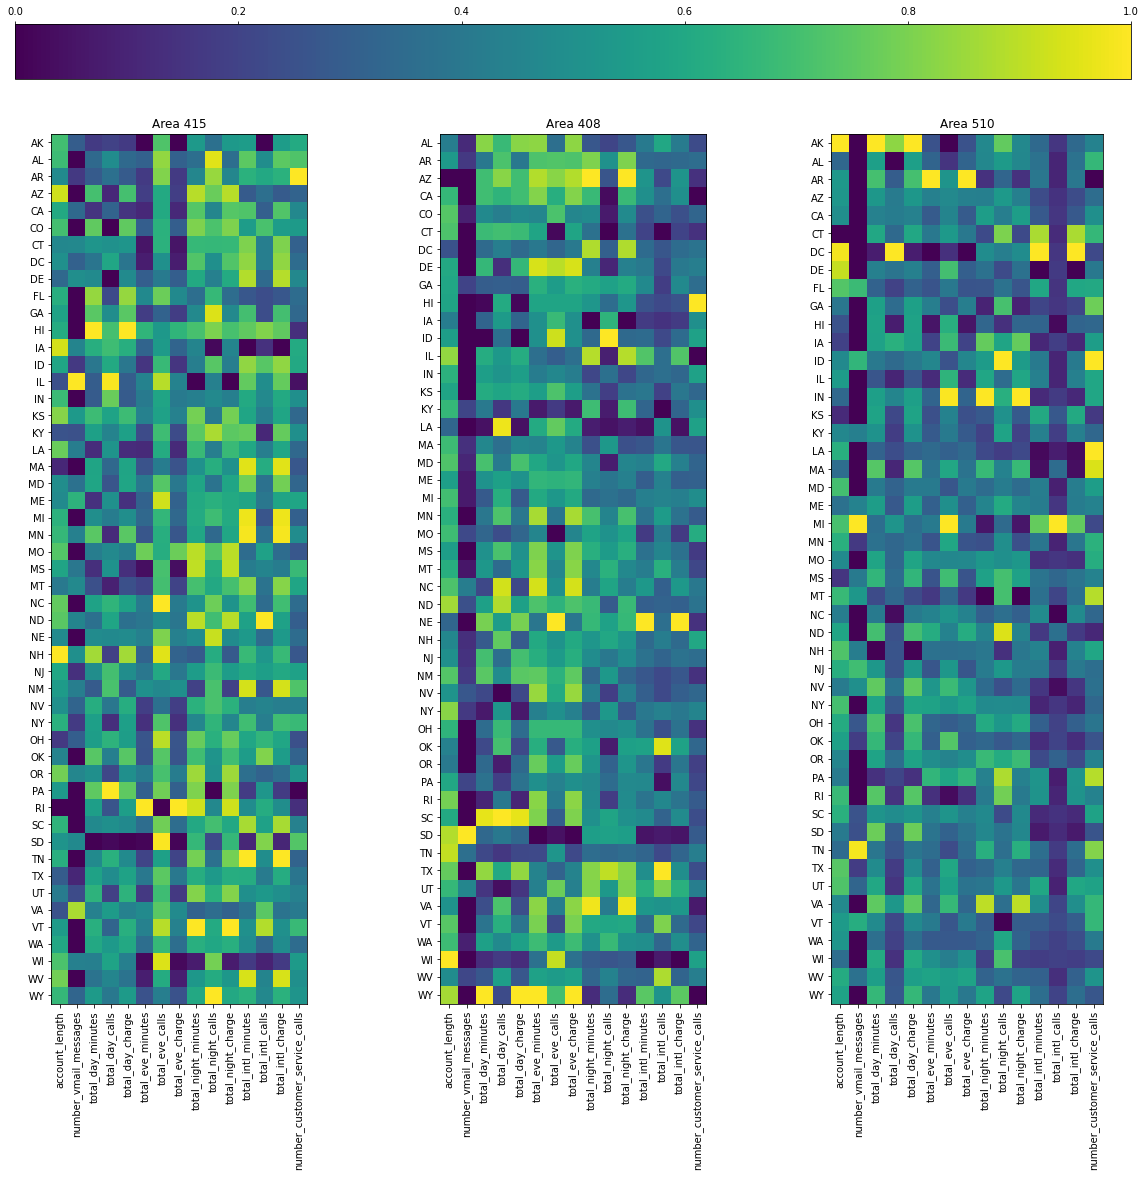

In [11]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(1, 3, figsize=(20,20))
codes = ['415','408','510']
for i, ax in enumerate(axs.ravel()):
    churn = group_means.filter(like='True', axis=0).filter(
        like=codes[i], axis=0).reset_index((1, 2)).drop(['area_code', 'churned'], axis=1)
    
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(churn.values)
    s_churn = pd.DataFrame(x_scaled, columns=group_means.columns,index=churn.index)
    
    ax.imshow(s_churn, cmap='viridis')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=churn.columns, rotation='vertical')
    ax.set_yticks(np.arange(churn.shape[0]), labels=churn.index)
plt.colorbar(axs[0].images[0],ax=axs,location='top')

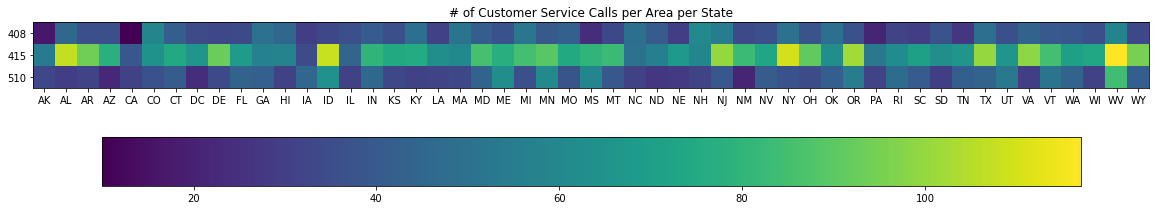

In [12]:
#Combined churned and not churned
table = pd.pivot_table(data, values='number_customer_service_calls', index=['state'],columns=['area_code'], aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(table.T,cmap='viridis')
plt.colorbar(orientation='horizontal')
ax.set_xticks(np.arange(51), labels=table.index)
ax.set_yticks(np.arange(3), labels=table.columns)
ax.set_title("# of Customer Service Calls per Area per State")
plt.show()

<AxesSubplot:xlabel='account_length', ylabel='number_customer_service_calls'>

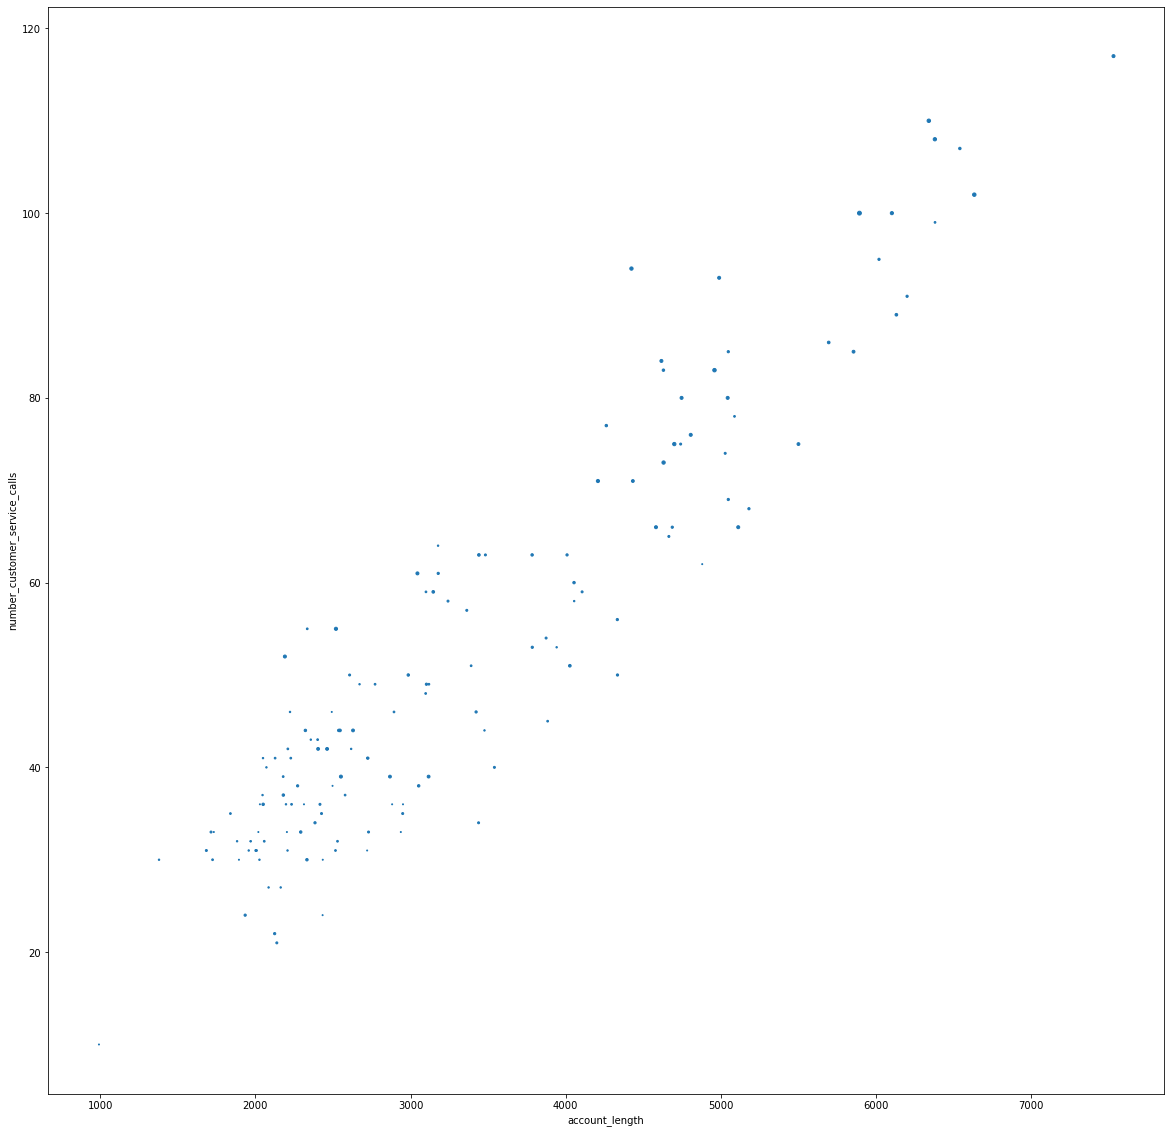

In [20]:
table2 = pd.pivot_table(data, values=['account_length','number_customer_service_calls', 'churned'], index=['state'],columns=['area_code'], aggfunc=np.sum)
table2.plot(kind='scatter',x='account_length', y='number_customer_service_calls', s='churned', figsize=(20,20))

In [19]:
table2

account_length             churned          \
area_code            408   415   510     408 415 510   
state                                                  
AK                  1257  3873  2019       0   4   1   
AL                  3422  6539  2026       5   6   2   
AR                  2416  4423  1968       4  11   1   
AZ                  2029  5087  2124       1   3   5   
CA                   992  2551  1684       1   9   4   
CO                  3146  4664  1631       7   4   0   
CT                  2617  4699  2228       2  11   3   
DC                  1839  4686  2433       3   5   1   
DE                  1732  4988  2384       1   9   5   
FL                  2512  5047  2545       0   5   7   
GA                  2607  3362  2357       4   4   2   
HI                  2492  4054  2207       1   2   2   
IA                  1379  2949  2223       2   4   2   
ID                  2203  6378  3177       1  11   2   
IL                  2881  3883  2007       1   3   3   
IN                  2049  4746  2893       2   9   3   
KS                  2050  5499  2729       6   8   4   
KY                  2671  4805  2003       2   9   4   
LA                  2720  3482  1970       1   4   2   
MA                  4026  4053  1714       7   6   4   
MD                  2404  5694  2322       8   7   6   
ME                  2180  4261  3440       6   6   7   
MI                  2190  5854  2313       9   8   1   
MN                  3540  6130  3044       4   7   9   
MO                  2401  4740  2272       3   4   5   
MS                  1934  5043  3099       5   9   3   
MT                  2292  4958  2179       6  12   3   
NC                  3102  4333  1957       5   5   2   
ND                  2726  4332  2163       3   5   2   
NE                  1894  5180  1704       1   5   0   
NH                  3178  4105  2529       5   4   3   
NJ                  2519  6101  2867      10  10   8   
NM                  3438  4629  1248       4   6   0   
NV                  2233  4630  2127       3  11   3   
NY                  2985  6339  2046       6  12   2   
OH                  3052  6199  2426       6   5   4   
OK                  3118  3783  2461       3   6   7   
OR                  2578  6632  2334       3  12   3   
PA                  2138  3941  1882       4   2   2   
RI                  2057  4879  3097       3   1   3   
SC                  1724  4432  2723       3   8   5   
SD                  2497  4008  2332       1   5   6   
TN                  2085  4581  2209       2   9   3   
TX                  2771  5892  2629       3  15   8   
UT                  2197  5111  3784       2   9   5   
VA                  3476  6379  2434       2   3   1   
VT                  2071  5047  3390       2   5   3   
WA                  3116  4207  2537       8  10   6   
WI                  2951  5027  2516       1   4   3   
WV                  3241  7529  4616       4   9   9   
WY                  2937  6018  2464       1   5   5   

          number_customer_service_calls           
area_code                           408  415 510  
state                                             
AK                                   17   54  33  
AL                                   46  107  30  
AR                                   36   94  32  
AZ                                   36   78  22  
CA                                   10   39  31  
CO                                   59   65  37  
CT                                   42   75  41  
DC                                   35   66  24  
DE                                   33   93  34  
FL                                   34   69  44  
GA                                   50   57  43  
HI                                   46   58  31  
IA                                   30   35  46  
ID                                   33  108  64  
IL                                   36   45  31  
IN                                   41   80  46  
KS              